# Group 9 ISSS609  Project Code

# Sephora Sentiments: Unveiling Insights through Text Analytics

# Loading The Packages

In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand
import re

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import rand
from ast import literal_eval
from matplotlib import colormaps
import squarify

from wordcloud import WordCloud
import networkx as nx
import pickle
import string
from collections import Counter, defaultdict
import operator
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim import corpora


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###### run this to get the requirements

# Loading the Data

- Our projects consists of two main data sets :
    - Product information data set which is named as produt_info.
    - Total Reviews, the data come in multiple data sets which will be concatenated into one single data set names as reviews_df

##### Here we explore the Product  Data set

In [2]:
product_info = pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\product_info.csv")

In [3]:
product_info.shape

(8494, 27)

In [4]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [5]:
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
# Check for any duplicate products in the data set - we filter on the product id

In [7]:
product_info = product_info[~product_info.duplicated(subset = ['product_id'])]

In [8]:
product_info.shape # the total of no of rows did not change which shows that there are no duplicates in the dataset

(8494, 27)

In [9]:
(product_info.isna().mean() * 100).sort_values(ascending=False).round(1) # Percent of missing values

sale_price_usd        96.8
value_price_usd       94.7
variation_desc        85.3
child_max_price       67.6
child_min_price       67.6
highlights            26.0
size                  19.2
variation_value       18.8
variation_type        17.0
tertiary_category     11.7
ingredients           11.1
rating                 3.3
reviews                3.3
secondary_category     0.1
sephora_exclusive      0.0
brand_id               0.0
child_count            0.0
primary_category       0.0
new                    0.0
out_of_stock           0.0
online_only            0.0
limited_edition        0.0
brand_name             0.0
product_name           0.0
price_usd              0.0
loves_count            0.0
product_id             0.0
dtype: float64

In [10]:
product_info.describe().round(2)  # Check data consistency if there are any outliers, trends, etc.

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.00,8494.00,8216.00,8216.00,8494.00,451.00,270.00,8494.00,8494.00,8494.00,8494.00,8494.00,8494.00,2754.00,2754.00
mean,5422.44,29179.57,4.19,448.55,51.66,91.17,20.21,0.07,0.07,0.22,0.07,0.28,1.63,53.79,39.67
std,1709.60,66092.12,0.52,1101.98,53.67,79.20,24.33,0.26,0.26,0.41,0.26,0.45,5.38,58.77,38.69
min,1063.00,0.00,1.00,1.00,3.00,0.00,1.75,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00
25%,5333.00,3758.00,3.98,26.00,25.00,45.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00,19.00
50%,6157.50,9880.00,4.29,122.00,35.00,67.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,32.00,28.00
75%,6328.00,26841.25,4.53,418.00,58.00,108.50,25.00,0.00,0.00,0.00,0.00,1.00,1.00,59.00,42.00
max,8020.00,1401068.00,5.00,21281.00,1900.00,617.00,320.00,1.00,1.00,1.00,1.00,1.00,105.00,570.00,400.00


# Data сleansing

from the first glances of the data it is understood that only the 'ingredients' and 'size' columns need to be cleaned and rest of the data is pretty much clean. 
- for now we want to clean this column because bigger zise items can have higher prices and hence when a customer order a bigger size variation and is not happy with the product there are very high chances for a negative review , Ofcourse this will be tested with a correlation matrix at later stages of the analysis.

### The 'size' column

The 'size' column looks significant for the next analysis, so I need to convert its values ​​from strings to numbers. This column contains many different values, such as:
 - 1.7 oz/ 50 mL
 - Mascara Base - 0.13 oz/ 4 mL
 - 11" H x 16" W x 5" L

Let's calculate which units 'oz', 'ml' or 'g' are most common. Sometimes the function will count incorrectly because it will encounter values ​​such as 'Or**g**anic Crema 25 ml', but this is an acceptable error

In [11]:
units = ['oz', 'ml', 'g']
counter = [sum(isinstance(val, str) and unit in val.lower() 
          for val in product_info['size']) 
          for unit in units]

for unit, number in zip(units, counter):
    print(f'{unit} = {number}')

oz = 6614
ml = 5170
g = 1300


Since most products are in ounce format, let's write a function that extracts the ounces in 'float' format for each product, otherwise it returns NaN

In [12]:
def get_oz_values(val: any) -> any:
    """Extracts the value representing ounces, otherwise returns NaN.
    
    Returns:
        int | float | np.nan
    """

    if isinstance(val, str) and ('oz' in val.lower()):
        try:
            oz_start = val.lower().find('oz')
            clean_val = val[:oz_start].strip().lower().replace('fl.', '').replace('–', '*') \
                .replace('fl', '').replace('x', '*').replace('-', '*')
            if '/' in clean_val:
                clean_val = clean_val[clean_val.find('/') + 1:].strip()
            if '*' in clean_val:
                i = [x.isdigit() for x in clean_val].index(True)
                clean_val = round(eval(clean_val[i:]), 2)
            return float(clean_val)
        except:
            return np.nan

    elif isinstance(val, (int, float)):
        return val

    else:
        return np.nan

Using the new function, I will create a new column 'size_oz' and look at the result written in it

In [13]:
# Create a new column containing only the ounce values
product_info['size_oz'] = (product_info['size'].apply(get_oz_values)).to_frame()

# Show first rows of original and new columns
with pd.option_context('display.max_colwidth', 20, 'display.max_columns', None):
    display(product_info[['size', 'size_oz']].head(10))

# Show how many non-null values in new column and what is the data type
non_null_count = product_info['size_oz'].count()
data_type = product_info['size_oz'].dtype
print(f'\nColumn "size_oz" has:\n'
      f'  - non-null values: {non_null_count} (df size is {len(product_info)})\n'
      f'  - data type: {data_type} \n')

,size,size_oz
0,NaN,NaN
1,3.4 oz/ 100 mL,3.40
2,3.4 oz/ 100 mL,3.40
3,3.4 oz/ 100 mL,3.40
4,3.4 oz/ 100 mL,3.40
5,0.25 oz/ 7.5 mL,0.25
6,0.25 oz/ 7.5 mL,0.25
7,3.4 oz/ 100 mL,3.40
8,3.4 oz/ 100 mL,3.40
9,0.25 oz/ 7.5 mL,0.25



Column "size_oz" has:
  - non-null values: 6595 (df size is 8494)
  - data type: float64 



For clarity, We'll also visualize the 10 most frequent volumes/weights in ounces

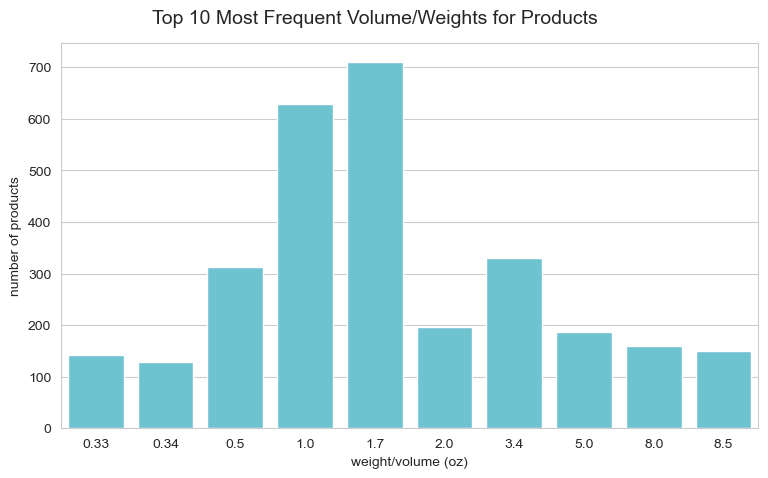

In [14]:
count_ounces = product_info['size_oz'].value_counts().rename_axis('size_oz').reset_index(name='count').round(2).head(10)

sns.set_style('whitegrid')
sns.barplot(x='size_oz', y='count', data=count_ounces, color='#5FCEE0').set(ylabel='number of products', xlabel='weight/volume (oz)')
plt.title('Top 10 Most Frequent Volume/Weights for Products', fontsize=14, y=1.03, x=0.45)
plt.gcf().set_size_inches(9, 5);

# Correlation Analysis

Below we will construct a correlation matrix:
- Pearson's correlation matrix

> What Is Pearson correlation Matrix ?
>
> Pearson's correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables

Although the Pearson correlation is a widely used, it has some limitations. It only applies to continuous variables and linear relationships, and is sensitive to outliers. However, it is a classic useful way to look at the data through this matrix for a complete analysis.


In [15]:
# Select columns of interest for correlation matrices
columns = ['loves_count', 'rating', 'reviews', 'size_oz',  
       'variation_type', 'price_usd', 'value_price_usd', 'sale_price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'primary_category', 'secondary_category',
       'tertiary_category', 'child_count', 'child_min_price', 'child_max_price']

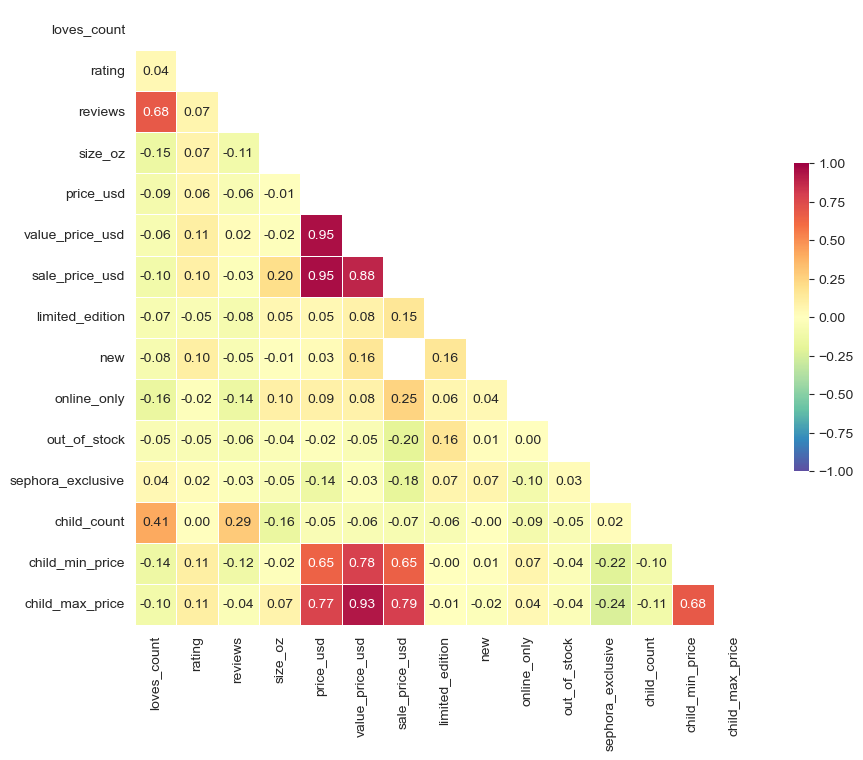

In [16]:
# Compute the correlation matrix
corr = product_info[columns].corr()

# Set up the figure size
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, fmt='.2f',
            mask=np.triu(np.ones_like(corr, dtype=bool)),  # Mask for the upper triangle
            cmap='Spectral_r',
            linewidths=.5, cbar_kws={'shrink':.5});

Based on this Pearson's correlation matrix, we observe the following:

High correlation
- **reviews** | **loves_count**. The more reviews, the more likes (and vice versa). Obviously these are indicators of the popularity of the product 
- **price_usd** | **sale_price_usd** | **value_price_usd**. It is also obvious that they are related, since the calculation of the value and the discount price is based on the normal price of the product
- **child_min_price** | **child_max_price** | **all prices**. It can be seen that variations of the same product do not have significant price differences from the basic price and the relationship between them is clearly visible
- **child_min_price** | **child_max_price**. If a product has only one variation, its price is written in both columns at once, which is why the connection is so strong

Medium correlation
- **child_count** | **loves_count**. The more variations a product has, the more likes it gets. Given that there is a strong correlation between the number of likes and reviews, we assume that products with more variations will have more reviews

Low correlation
- **online_only** | **sale_price_usd**. Probably products sold online only more often at discounts
- **child_count** | **reviews**. Another confirmation of the assumption made earlier in the 'Medium correlation' section

## Distribution of products by categories

Let's visualize how many total products are in each primary category. 
Since the 'Gifts' category has only 4 products, exclude it from the following chart:

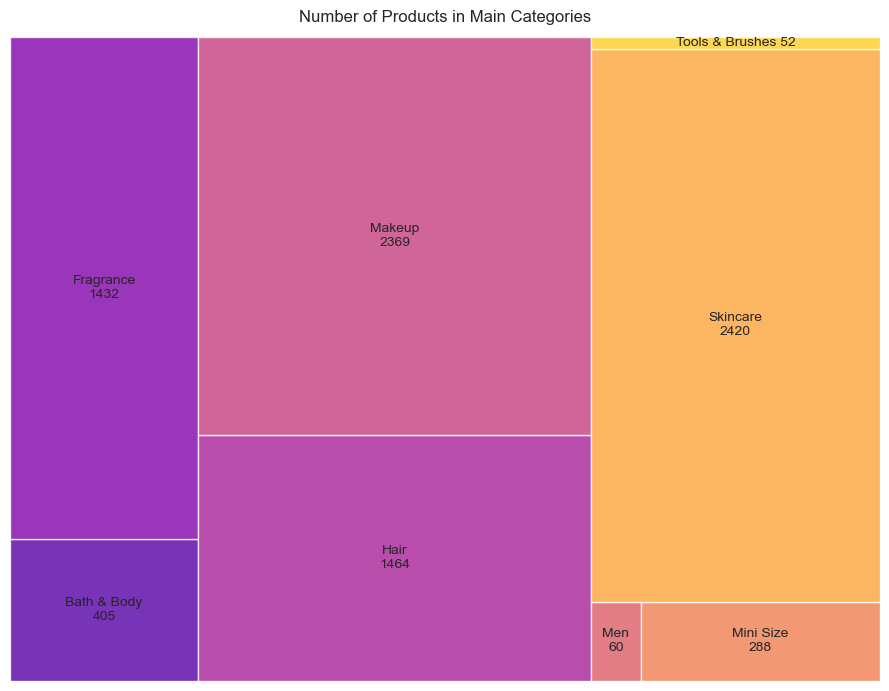

In [17]:
# Create the dataframe
df2 = product_info[['product_id', 'primary_category']].drop(product_info[product_info.primary_category == 'Gifts'].index)

# Create a pivot table to count the number of products in each category
pivot_table = pd.pivot_table(df2, index=['primary_category'], values='product_id', aggfunc='count')
pivot_table.reset_index(inplace=True)
pivot_table.columns = ['primary_category', 'count']

# Create the labels for the treemap
labels = pivot_table.apply(lambda x: f"{x['primary_category']} {x['count']}" 
                           if x['primary_category'] == 'Tools & Brushes' 
                           else f"{x['primary_category']}\n{x['count']}", 
                           axis=1).to_list()

# Create the values for the treemap
values = pivot_table['count'].tolist()

# Create colors for the treemap, change the 'plasma' colormap to make it lighter
lighter_cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'lighter_plasma', mpl.colormaps['plasma'](np.linspace(0.15, 1, 256)))
x = rand(8)  # 8 rectangles used
colors = [lighter_cmap(i) for i in np.arange(0, 1, 1/len(x))]

# Set the size of the plot
fig = plt.figure(figsize=(9, 7))

# Create the treemap
squarify.plot(sizes=values, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':10}, norm_x=200)

# Adjust the plot parameters
plt.title('Number of Products in Main Categories', y=1.01)
plt.axis('off')
plt.tight_layout()

As we can see, most products fall into 4 categories, which is consistent with general [statistics](https://explodingtopics.com/blog/beauty-industry-stats#skincare-products-stats) about the beauty industry.We assume Skin care should easily be one of the most revenue generating category.

Next, We'll do a visualization showing the distribution of products into more general primary categories and narrowly focused tertiary categories.
- this can give an very rough idea what could be most frequently taked about topics in the reviwes.

In [18]:
# How many products have both tertiary and primary categories?
(product_info.groupby('primary_category', dropna=True)['tertiary_category'].agg(['count'])
   .sort_values('count', ascending=False)
   .reset_index())

,primary_category,count
0,Makeup,2216
1,Skincare,2040
2,Fragrance,1416
3,Hair,1345
4,Bath & Body,377
5,Men,59
6,Tools & Brushes,51
7,Gifts,0
8,Mini Size,0


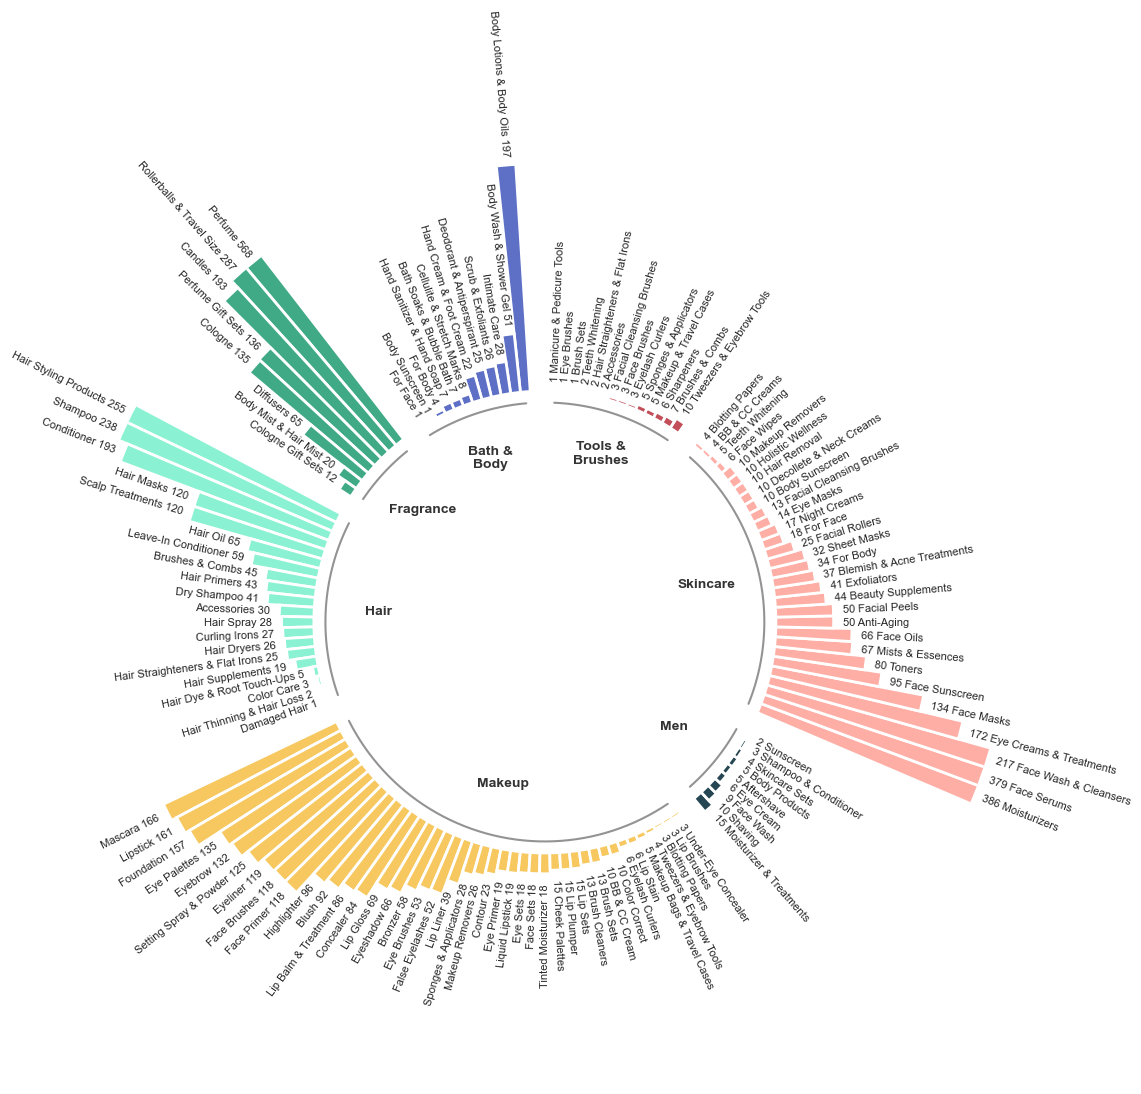

In [19]:
######################
# Arrange data frame and extract all required values

# Create sorted dataframe and exclude Gifts and Mini Size categories
df_sorted = (
    product_info.loc[~product_info['primary_category'].isin(['Gifts', 'Mini Size'])]
    .groupby(['primary_category', 'tertiary_category'], dropna=True)
    .size()
    .reset_index(name='count')
    # .query('count > 2')
    .sort_values(['primary_category', 'count'], ascending=[1, 0])
)

# Create variables based on sorted dataframe
VAL_LABEL = df_sorted['count'].values
VALUES = np.where(df_sorted['count'] > 450, df_sorted['count'] / 4, df_sorted['count'] / 2)
LABELS = df_sorted['tertiary_category'].values
GROUP = df_sorted['primary_category'].values
GROUPS_SIZE = df_sorted.groupby('primary_category')['tertiary_category'].count().tolist()

######################
# Basic shape, color and size settings

# Shape setting
PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
OFFSET = np.pi / 2

# Color setting
color_map = {
    'Tools & Brushes': '#C34F5A', # firebrick
    'Skincare': '#feaea5', # salad green
    'Men': '#264653', # dark blue
    'Makeup': '#f6c85f', # yellow
    'Hair': '#8af2d2', # light blue
    'Fragrance': '#40aa87', # green
    'Bath & Body': '#5d70c6'# sapphire blue
    }
COLORS = [color_map[group] for group in GROUP]


# Size setting
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD


fig, ax = plt.subplots(figsize=(22, 12), subplot_kw={'projection': 'polar'})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

######################
# Add bars and text for each subcategory (tertiary category)

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = 'right'
        rotation = rotation + 180
    else: 
        alignment = 'left'
    return rotation, alignment

def add_labels(angles, values, labels, val_label, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them
    for angle, value, label, val_label in zip(angles, values, labels, val_label):
        angle = angle
        if value >= 100:
            value = 100
        
        # Obtain text rotation, alignment and label names
        rotation, alignment = get_label_rotation(angle, offset)

        if alignment == 'right':
            s = f'{label} {val_label}'
        else:
            s = f'{val_label} {label}'
            

        # Add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=s, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode='anchor',
            fontsize=8
        )

# Create bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor='white', linewidth=2
)

# Add labels for each subcategory (tertiary category)
add_labels(ANGLES[IDXS], VALUES, LABELS, VAL_LABEL, OFFSET, ax)

######################
# Add lines and annotations for each group (primary category)

offset = 0
for group, size in zip(list(np.unique(GROUP)), GROUPS_SIZE):
    # Calculate x coordinates for the current group and plot a line below the bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color='#939393')
    
    # Add text to indicate group
    if group == 'Tools & Brushes':
        mod_group = 'Tools &\nBrushes'
        ax.text(
            np.mean(x1), -23, mod_group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    elif group == 'Bath & Body':
        mod_group = 'Bath &\nBody'
        ax.text(
            np.mean(x1), -25, mod_group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    else:
        ax.text(
            np.mean(x1), -28, group, color='#333333', fontsize=10, 
            fontweight='bold', ha='center', va='center'
        )
    # Update the offset for the next group
    offset += size + PAD

## Customer favorite

According to a lot of research, the availability of ratings and reviews plays a crucial role in the process of choosing and buying products online, so their distribution can tell us a lot.

### Average likes, ratings and reviews by category

A quick look at the average distribution of the parameters of interest by category. In general, I see confirmation of the correlation established at the beginning between the number of 'loves' and the reviews. 

In [20]:
(product_info.groupby('primary_category')
   .agg(total_prod=('product_id', 'count'),
       avg_rating=('rating', 'mean'),
       avg_reviews=('reviews', 'mean'),
       avg_loves=('loves_count', 'mean'))
   .sort_values('total_prod', ascending=False)
   .round(2)
   .reset_index())

,primary_category,total_prod,avg_rating,avg_reviews,avg_loves
0,Skincare,2420,4.23,463.87,27111.17
1,Makeup,2369,4.15,682.00,54235.49
2,Hair,1464,4.20,253.90,13710.24
3,Fragrance,1432,4.23,266.23,12757.71
4,Bath & Body,405,4.20,198.99,16453.69
5,Mini Size,288,4.01,719.05,26676.97
6,Men,60,4.50,72.71,4855.87
7,Tools & Brushes,52,4.27,220.08,14988.88
8,Gifts,4,4.56,17.00,0.00


### Products

Bazaarvoice as a service provider, talks about the [importance](https://www.bazaarvoice.com/blog/why-ratings-and-reviews-are-important-for-your-business/) of ratings and reviews for the business. Let's see how many products have no stars or reviews at all:

In [21]:
# How many products don't have reviews, ratings, or 'love' from customers?
print('Total products in the online store:', product_info.shape[0])
print('\nNo reviews:', len(product_info[product_info['reviews'] == 0]))
print('No "love" (equivalent of likes):', len(product_info[product_info['loves_count'] == 0]))
print('No rating (no stars):', len(product_info[product_info['rating'] == 0]))

Total products in the online store: 8494

No reviews: 0
No "love" (equivalent of likes): 91
No rating (no stars): 0


Every product in this store has at least one review and a non-zero rating! Consistently putting words into action.

Find the 10 products with the most 'loves':

In [22]:
# Top 10 products with the most loves (=likes) count
(product_info[['product_name','brand_name', 'tertiary_category', 
     'loves_count', 'rating', 'reviews']]
     .sort_values('loves_count', ascending=False).head(10))

,product_name,brand_name,tertiary_category,loves_count,rating,reviews
6242,Soft Pinch Liquid Blush,Rare Beauty by Selena Gomez,Blush,1401068,4.5356,4733.0
5249,Radiant Creamy Concealer,NARS,Concealer,1153594,4.3080,12887.0
4431,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,NaN,1081315,4.3508,16118.0
6434,Cream Lip Stain Liquid Lipstick,SEPHORA COLLECTION,Lipstick,1029051,4.3201,11111.0
2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,Lip Gloss,968317,4.6357,12136.0
2524,Pro Filt’r Soft Matte Longwear Liquid Foundation,Fenty Beauty by Rihanna,Foundation,856497,4.0356,16935.0
5250,Blush,NARS,Blush,840076,4.6643,18127.0
247,Brow Wiz Ultra-Slim Precision Brow Pencil,Anastasia Beverly Hills,Eyebrow,834189,4.4056,15885.0
4458,Translucent Loose Setting Powder,Laura Mercier,Setting Spray & Powder,813497,4.5029,9335.0
7648,Niacinamide 10% + Zinc 1% Oil Control Serum,The Ordinary,Face Serums,763168,4.2439,5778.0


The first product on the list and the last two look interesting, as you can see compared to the rest of the products, they should have a lot more reviews with so many likes.

The number of reviews seems to be the most trustworthy feature for analyzing the popularity of products, let's continue with the reviews. Just now we saw the best products, are there outsiders in the store? 

According to [research](https://spiegel.medill.northwestern.edu/wp-content/uploads/sites/2/2021/04/Spiegel_Online-Review_eBook_Jun2017_FINAL.pdf), a customer should read at least 11 (and [the more the better](https://www.powerreviews.com/blog/how-many-product-reviews/#:~:text=Consumers%20Pay%20Attention%20to%20Review%20Quantity&text=Our%20research%20found%20that%2099,have%20more%20than%20100%20reviews.)) reviews to make sure that this product has been tried by enough people and overcome the fear of buying an unknown product.

For the following table, I used a threshold of 20 reviews:

In [23]:
# Top 10 worst rated products (with at least 20 reviews)
(product_info[['product_name','brand_name', 'tertiary_category', 'rating', 
     'price_usd', 'reviews', 'loves_count']]
     .query('reviews >= 20')
     .sort_values('rating', ascending=True)
     .head(10))

,product_name,brand_name,tertiary_category,rating,price_usd,reviews,loves_count
340,Laminated Look Brow Kit,Anastasia Beverly Hills,Eyebrow,1.1905,24.0,21.0,3778
6920,Mini Super Slick Tinted Lip Balm,SIMIHAZE BEAUTY,Lipstick,1.6667,24.0,33.0,6499
2723,Holiday Candle Advent Calendar,FORVR Mood,Candles,1.7727,75.0,22.0,5095
4511,Mini Translucent Pure Setting Spray 16HR,Laura Mercier,Setting Spray & Powder,1.7727,21.0,22.0,2607
4567,Click Magnetic Collection Starter Kit—Bestie,Lilly Lashes,False Eyelashes,1.8750,35.0,32.0,3034
3073,Nail Art Stickers,Gucci,NaN,1.9355,20.0,31.0,4551
6774,Color Safe Conditioner,SEPHORA COLLECTION,Conditioner,2.1429,12.0,21.0,1000
6696,Eyebrow Razor Set,SEPHORA COLLECTION,Eyebrow,2.1739,10.0,23.0,4770
6657,LashCraft Have It All Mascara,SEPHORA COLLECTION,Mascara,2.2622,12.0,164.0,8251
5290,High-Pigment Longwear Eyeliner,NARS,Eyeliner,2.2627,24.0,236.0,19169


Rating - is a 5 star rating system.  Let's see below what distribution of products by rating

In [24]:
# Distribution of products by rating
product_info['rating_scale'] = pd.cut(product_info['rating'], [0, 1, 2, 3, 4, 5])
(product_info.groupby('rating_scale')['product_name']
           .agg(['count'])
           .reset_index()
           .rename(columns={'rating_scale': 'rating scale', 
                            'count': 'number of products'}))

,rating scale,number of products
0,"(0, 1]",12
1,"(1, 2]",36
2,"(2, 3]",231
3,"(3, 4]",2008
4,"(4, 5]",5929


As we can see above more than a half of all products have rating between 4 and 5 stars. Let's examine the statistics for products with such a rating in more detail:

In [25]:
rat_4plus = product_info[product_info['rating'] >= 4].shape[0]
rat_4plus_percent = round(rat_4plus / product_info.shape[0] * 100, 1)
rat_5 = (product_info['rating'] == 5).sum()
rat_most_pref = product_info['rating'].between(4.2, 4.7).sum()

print(f'''{product_info.shape[0]} - total number of products
\n{rat_4plus_percent}% ({rat_4plus} products) - percentage of products rated 4 or higher
\n{rat_most_pref} - products rated between 4.2 and 4.7
\n{rat_5} - products with a rating equal to 5''')

8494 - total number of products

71.9% (6103 products) - percentage of products rated 4 or higher

3894 - products rated between 4.2 and 4.7

256 - products with a rating equal to 5


 - Almost 72% of all online store assortment have rating 4 or higher.
 - According to [research](https://spiegel.medill.northwestern.edu/wp-content/uploads/sites/2/2021/04/Spiegel_Online-Review_eBook_Jun2017_FINAL.pdf), the most attractive rating for customers is between 4.2 and 4.7. And as I can see, most of the products with a rating of 4 or higher do fall in that range. 
 - At the same time, only 256 products have a rating of exactly 5 stars and are in the "too good to be true" spectrum.

These indicators quite clearly follow the most preferred product evaluation strategies and indicate and speak to the fact that Sephora, as well as Bazaarvoice, are very clear in their policies in this area.

## Now, lets explore the Reviews Dataset

In [26]:
df1=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_0-250.csv")

In [27]:
df2=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_1250-end.csv")

In [28]:
df3=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_250-500.csv")

In [29]:
df4=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_500-750.csv")

In [30]:
df5=pd.read_csv("C:\\Users\\User\\Desktop\\Textanalytics\\project\\data\\reviews_750-1250.csv")

In [31]:
df1.shape

(602130, 19)

In [32]:
df2.shape

(49977, 19)

In [33]:
df3.shape

(206725, 19)

In [34]:
df4.shape

(116262, 19)

In [35]:
df5.shape

(119317, 19)

In [36]:
###Concatenating the mutiple dataset for reviews

In [37]:
reviews_df = pd.concat([df1, df2,df3,df4,df5], axis=0, ignore_index=True)

In [38]:
reviews_df.shape

(1094411, 19)

In [39]:
reviews_df.head(3)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [40]:
reviews_df = reviews_df.drop('Unnamed: 0', axis=1)

In [41]:
reviews_df.head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [42]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8493
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   product_id          8494 non-null   object  
 1   product_name        8494 non-null   object  
 2   brand_id            8494 non-null   int64   
 3   brand_name          8494 non-null   object  
 4   loves_count         8494 non-null   int64   
 5   rating              8216 non-null   float64 
 6   reviews             8216 non-null   float64 
 7   size                6863 non-null   object  
 8   variation_type      7050 non-null   object  
 9   variation_value     6896 non-null   object  
 10  variation_desc      1250 non-null   object  
 11  ingredients         7549 non-null   object  
 12  price_usd           8494 non-null   float64 
 13  value_price_usd     451 non-null    float64 
 14  sale_price_usd      270 non-null    float64 
 15  limited_edition     8494 non-null   in

In [43]:
reviews_df['submission_time'] = pd.to_datetime(reviews_df['submission_time'])

# Find the oldest and newest date
oldest_date = reviews_df['submission_time'].min()
newest_date = reviews_df['submission_time'].max()

print(f"The oldest date is: {oldest_date}")
print(f"The newest date is: {newest_date}")


The oldest date is: 2008-08-28 00:00:00
The newest date is: 2023-03-21 00:00:00


In [44]:
result_df = pd.merge(reviews_df, product_info[['product_id','primary_category', 'secondary_category', 'tertiary_category']], on='product_id', how='left')

In [45]:
result_df.shape

(1094411, 21)

In [46]:
unique_products = result_df['product_id'].unique()

print(unique_products)
len(unique_products)

['P504322' 'P420652' 'P7880' ... 'P502745' 'P474936' 'P500101']


2351

##### only for the year 2022

In [47]:
latest_review = result_df[(result_df['submission_time'] >= '2022-01-01') & (result_df['submission_time'] <= '2022-12-31')]

In [48]:
latest_review.shape

(192227, 21)

In [49]:
latest_review.head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category
450,1796832802,3,0.0,0.714286,7,2,5,2022-12-31,I decided to try this as I had never used a li...,"Decent, but cheaper products do the trick",...,brown,combination,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN
451,10255886039,2,0.0,0.500000,2,1,1,2022-12-31,Might as well be putting on Vaseline because I...,Where’s the smell??,...,brown,normal,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN
452,5049431408,5,1.0,1.000000,4,0,4,2022-12-31,Love this lip mask nothing else will do Aquaph...,Must buy!,...,blue,combination,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN


In [50]:
unique_products_one = latest_review['product_id'].unique()

print(unique_products_one)
len(unique_products_one)

['P420652' 'P7880' 'P218700' ... 'P502745' 'P474936' 'P500101']


2076

##### Data Cleaning

Next we need to preprocess the text:

clean it up by getting rid of extraneous characters, punctuation, words with possible misprints, and 'stopwords' which do not add much meaning to a sentence

normalize the text using the lemmatization technique that switches any kind of a word to its base root mode. 

For example, lemmatizing the word 'Caring' would return 'Care'

Below We have written a function that cleans and lemmatizes each review:

In [51]:
def clean_text(text: str) -> str:
    """Cleans input text, tokenizes, removes stop words, and lemmatizes it"""

   
    text = re.sub(r'\d+|[^\w\s]|\b(\w+)(\s+\1)+\b', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()


    stop_words = set(stopwords.words('english'))
    tokens = (WordNetLemmatizer().lemmatize(w) 
              for w in word_tokenize(text) 
              if w not in stop_words and len(w) > 2)
 
    text = ' '.join(tokens)

    return text


latest_review['lemma_text'] = latest_review['review_text'].apply(clean_text)

# Create a column with a set of tokenized review words
latest_review['NLTK_text'] = latest_review['lemma_text'].apply(lambda x: nltk.Text(nltk.word_tokenize(x)))

In [52]:
print('Original reviews:')
for review in latest_review['review_text'].head():
    print(review)

print('\nLemmatized reviews:')
for review in latest_review['lemma_text'].head():
    print(review)

Original reviews:
I decided to try this as I had never used a lip mask at night. I find that it smells nice, pretty easy to apply, and does moisturize. However, I find that the products I was using before (drugstore lip rescue, lip scrubs, etc) have nearly the same effect at a fraction of the cost.
Might as well be putting on Vaseline because I can barely smell this! The berry shade has a strong berry smell, but this just smells like Vaseline to me. Maybe I got a bad batch but there’s barely a vanilla smell at all. It is moisturizing but so is Vaseline.
Love this lip mask nothing else will do Aquaphor and Vaseline just aren’t as moisturizing as this mask is I recommend it to everyone I know￼
I really enjoy this product! Amazing smell and the perfect consistency. It is a little weird at first to get used to the feeling on your lips when you wake up (because some of the dead skin becomes more evident) but it does a great job of moisturizing.
The best. I have nothing else to really say ot

#### Rating preprocessing

###### For machine learning, it is better to use simplified approaches to classifying ratings, and divide them into positive/negative or positive/neutral/negative.

##### Let's simplify the 5-point scale ratings and use some heuristics about how the rating represents sentiment:

rating > 3 is positive
rating = 3 is neutral
rating < 3 is negative
Let's create a new 'true_sentiment' column:

In [53]:
# Create a column with the verbal equivalent of a rating
latest_review['true_sentiment'] = latest_review['rating'].map({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})

# Show dataframe with new sentiment column
latest_review.head(3)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,product_id,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category,lemma_text,NLTK_text,true_sentiment
450,1796832802,3,0.0,0.714286,7,2,5,2022-12-31,I decided to try this as I had never used a li...,"Decent, but cheaper products do the trick",...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,decided try never used lip mask night find sme...,"(decided, try, never, used, lip, mask, night, ...",neutral
451,10255886039,2,0.0,0.500000,2,1,1,2022-12-31,Might as well be putting on Vaseline because I...,Where’s the smell??,...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,might well putting vaseline barely smell berry...,"(might, well, putting, vaseline, barely, smell...",negative
452,5049431408,5,1.0,1.000000,4,0,4,2022-12-31,Love this lip mask nothing else will do Aquaph...,Must buy!,...,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,Skincare,Lip Balms & Treatments,NaN,love lip mask nothing else aquaphor vaseline a...,"(love, lip, mask, nothing, else, aquaphor, vas...",positive


##### Review text 

In [54]:
latest_review['length'] = latest_review['lemma_text'].apply(len)
latest_review['length'].describe().round(1)

count    192227.0
mean        194.5
std         131.5
min           4.0
25%         117.0
50%         162.0
75%         235.0
max        1497.0
Name: length, dtype: float64

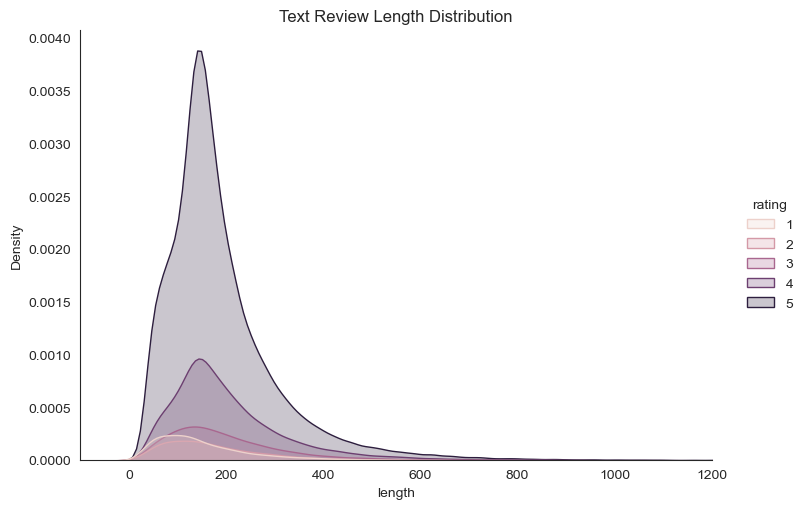

In [55]:
sns.set_style('white')
(sns.displot(data=latest_review, x='length', hue='rating', kind='kde', fill=True, aspect=1.5)
    .set(xlim=(-100, 1200), title='Text Review Length Distribution'));

In [56]:
# Compare mean review length across ratings
grouped = latest_review.groupby('rating')['length'].agg(mean_length='mean', count='count').reset_index().round(1)
grouped

,rating,mean_length,count
0,1,161.5,9067
1,2,189.4,8231
2,3,207.6,14588
3,4,208.5,37039
4,5,191.4,123302


##### Rating distribution

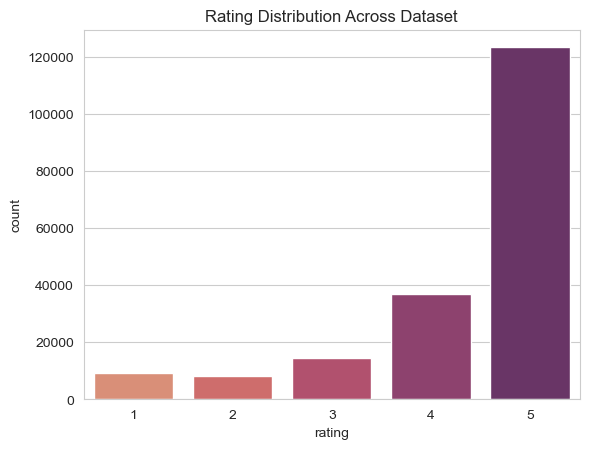

In [57]:
sns.set_style('whitegrid')
sns.countplot(data=latest_review, x='rating', palette='flare').set_title('Rating Distribution Across Dataset')
plt.show()

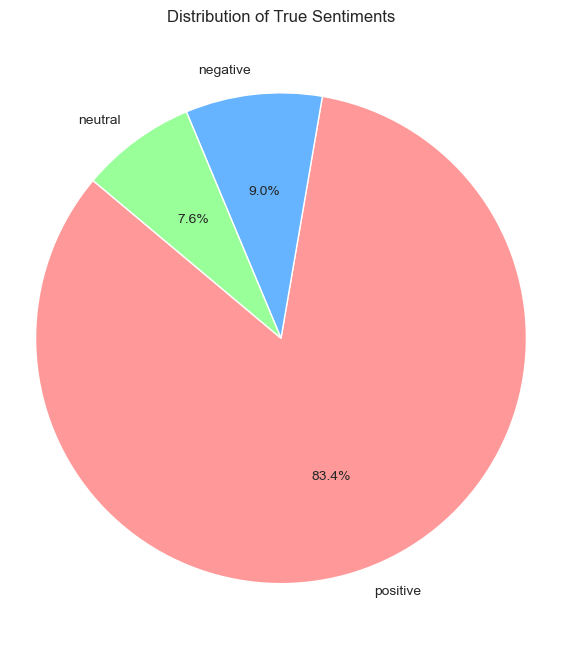

In [58]:
sentiment_counts = latest_review['true_sentiment'].value_counts()

# Define custom colors
colors = ['#ff9999','#66b3ff','#99ff99']

# Create a pie chart
plt.figure(figsize=(7, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of True Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## Most common words (unigrams)

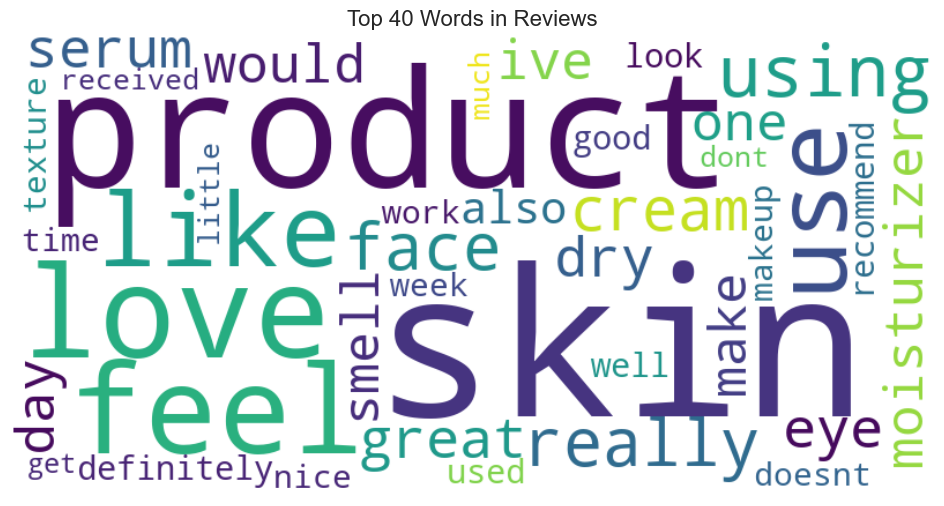

In [59]:
top_words = Counter(' '.join(latest_review['lemma_text']).split()).most_common(40)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud with a title
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Reviews', fontsize=16)
plt.show()


## Bigrams

##### Before, I was looking at one word at a time (unigrams), but now I'm moving on to looking at pairs of words (bigrams). Bigrams give more context and therefore are more informative than single words.

Let's find combinations of the most frequent pairs of words using previously created column 'NLTK_text' with word sequence:

In [60]:
# Create list of sorted bigrams
bigrams = Counter()
for phrase in latest_review['NLTK_text']:
    bigrams.update(nltk.bigrams(phrase))
    
bigrams_sorted = sorted(bigrams.items(), key=operator.itemgetter(1), reverse=True)
     

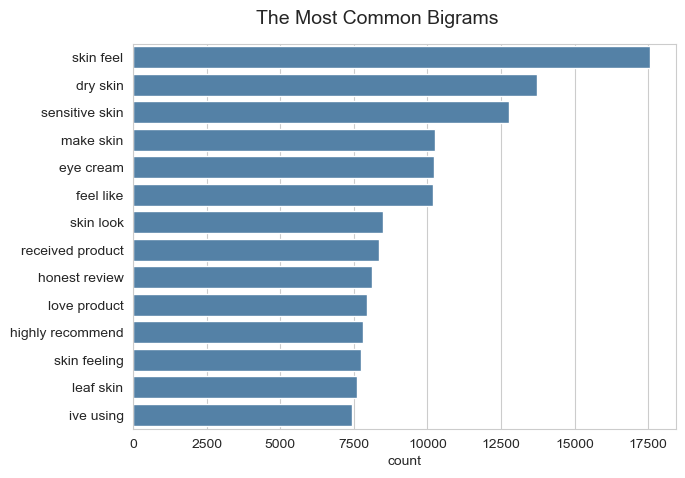

In [61]:
# Visualize bigrams frequency
bigrams_df = pd.DataFrame(bigrams_sorted[:14], columns=['bigram', 'count'])

plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')

sns.barplot(x='count', y=[' '.join(bigram) for bigram in bigrams_df['bigram']], data=bigrams_df, color='steelblue')

plt.xlabel('count')
plt.title('The Most Common Bigrams', fontsize=14, y=1.03, x=0.45);
plt.show()

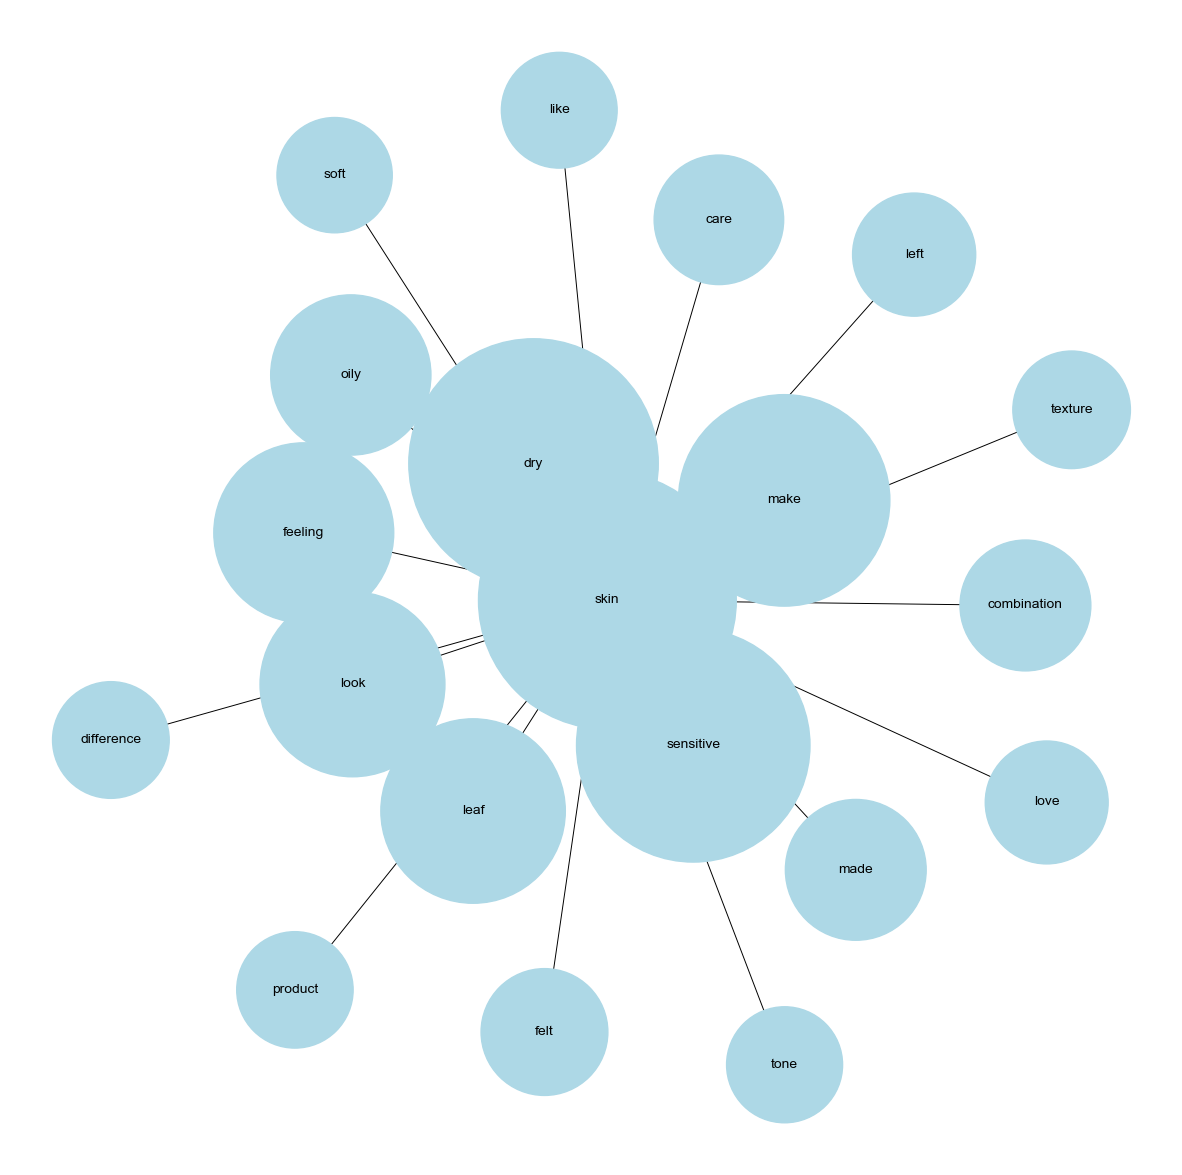

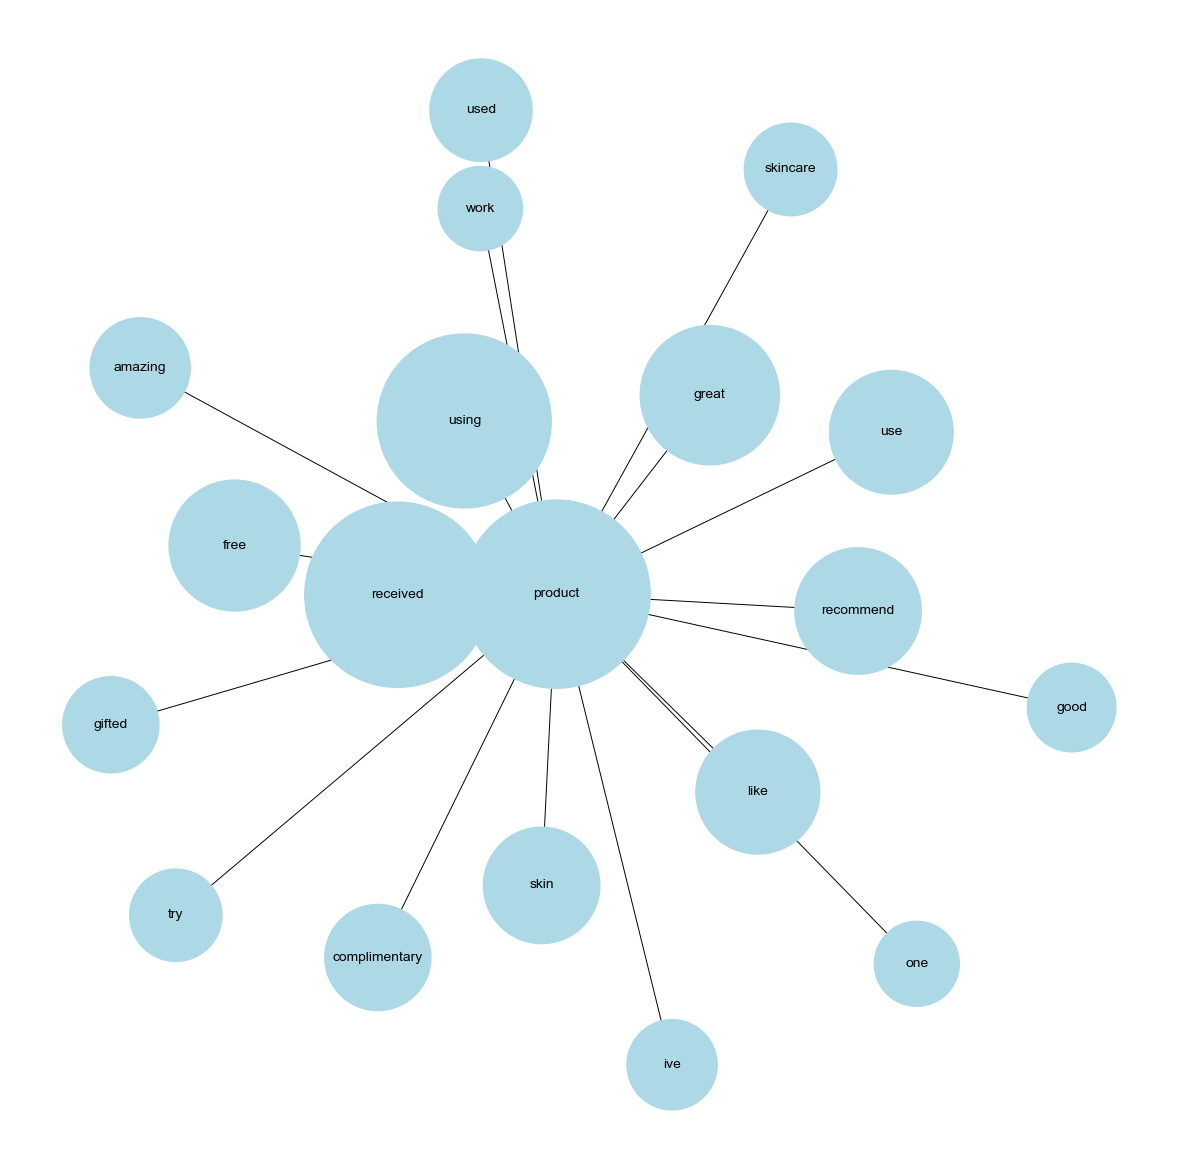

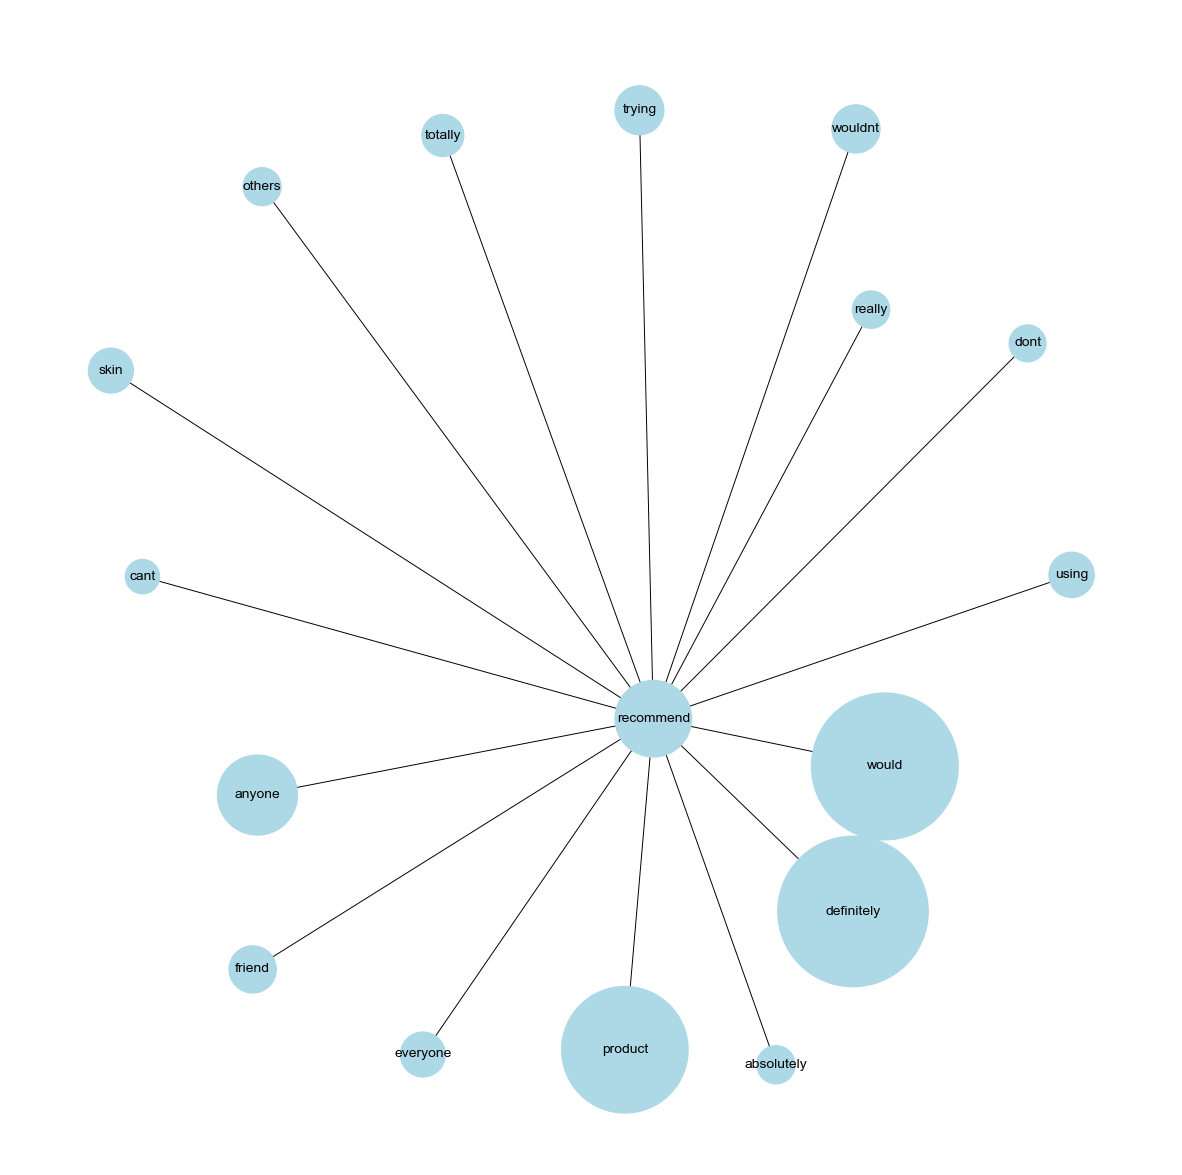

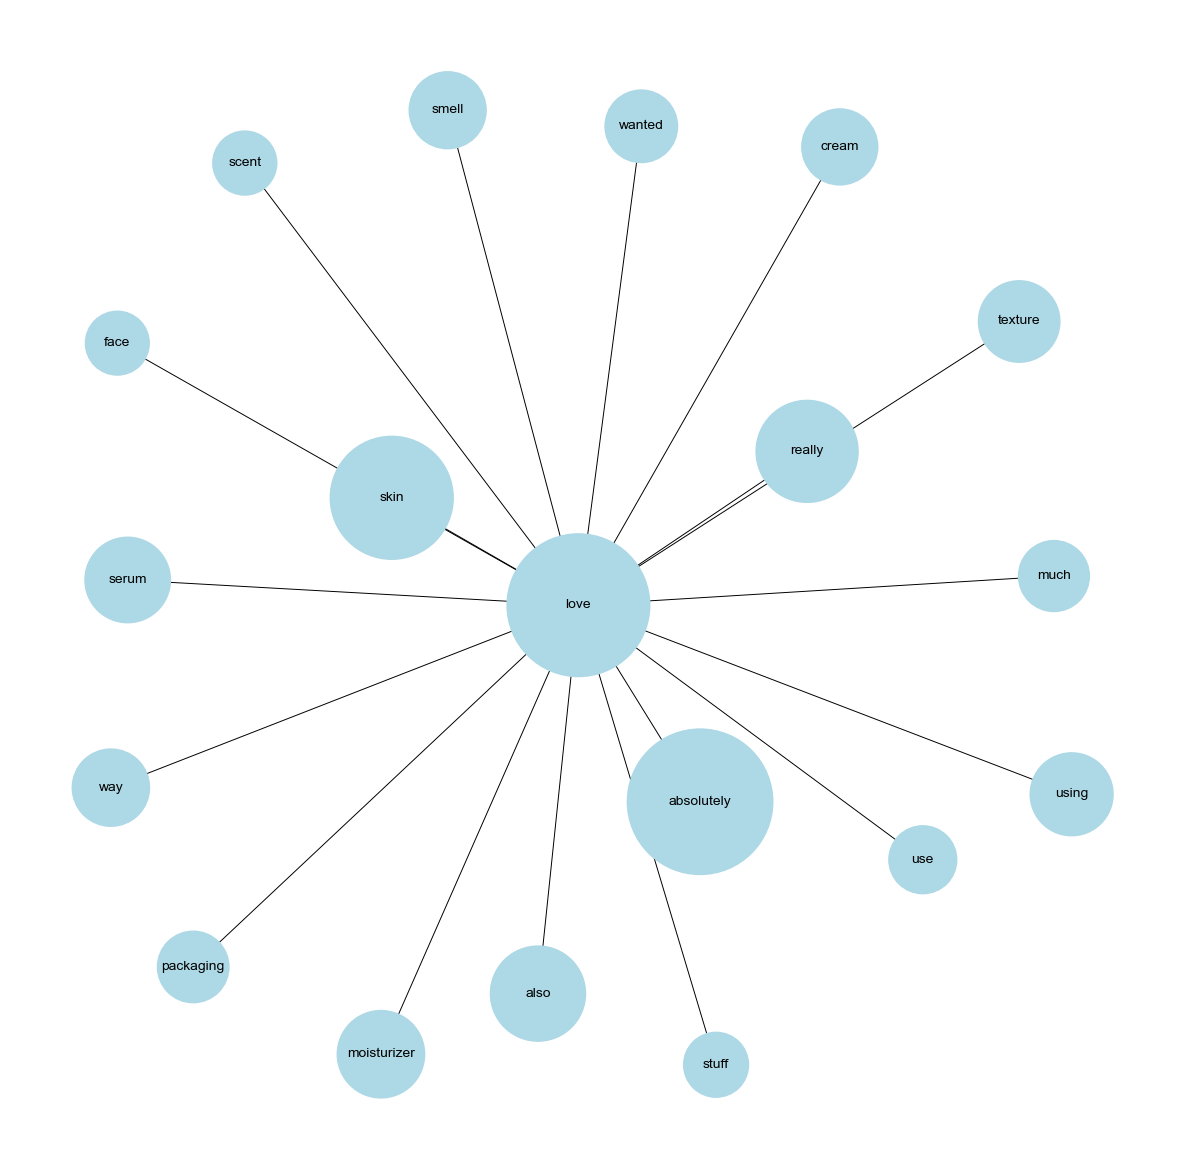

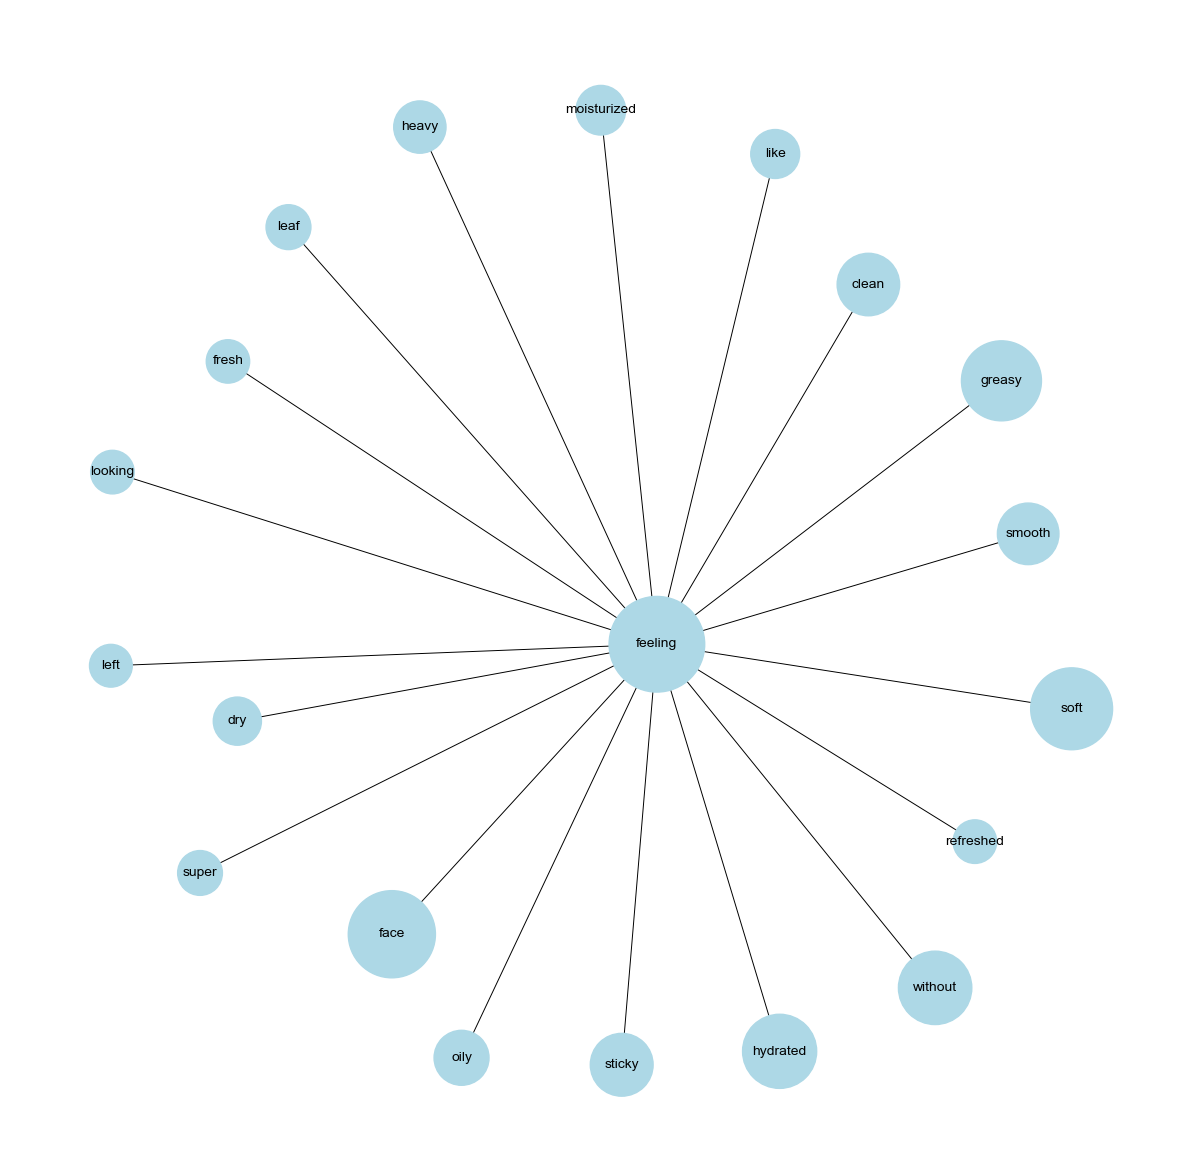

In [68]:
def draw_network(key_word: str, lst_start: int, lst_end: int, 
                 spring_k=7, nsize_1=8, nsize_2=100):
    """Returns a network graph with the keyword in the center"""

    # Create a list of bigrams for the keyword
    merged_dict = defaultdict(int)
    for bigram, count in bigrams_sorted:
        if key_word in bigram:
            if bigram[0].startswith(key_word):
                key = bigram
            else:
                key = (bigram[1], bigram[0])
            merged_dict[key] += count
    bigram_lst = sorted(merged_dict.items(), key=lambda x: x[1], reverse=True)[lst_start:lst_end]


    # Build a network graph
    G = nx.Graph()
    fig, ax = plt.subplots(figsize=(15, 15))  # Increased the figure size
    plt.axis('off')

    # Set the sizes and positions of the nodes
    node_sizes = {key_word: 800}  # Increased node size for key_word
    for edge, size in bigram_lst:
        node1, node2 = edge
        G.add_edge(node1, node2, weight=size)
        node_sizes[node1] = node_sizes[node2] = size
    pos = nx.spring_layout(G, k=spring_k)
    nsize_lst = [node_sizes[v] * nsize_1 
                 if v != key_word 
                 else node_sizes[v] * nsize_2 
                 for v in node_sizes]
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', ax=ax, node_size=nsize_lst)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, width=0.7);

# Call the function with adjusted parameters
draw_network('skin', 1, 20, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('product', 1, 19, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('recommend', 1, 17, spring_k=15, nsize_1=2, nsize_2=10)
draw_network('love', 1, 19, spring_k=15,  nsize_1=2, nsize_2=10)
draw_network('feeling', 1, 20,spring_k=15,  nsize_1=2, nsize_2=10)
plt.show()

## Trigrams
##### Now, let's look at combinations of three words (trigrams). Yes, we can continue to increase the size of the word group further, but as a rule it is optimal to stop at a group of the size of three words.

#### Let's build a visualization of the most common trigrams:

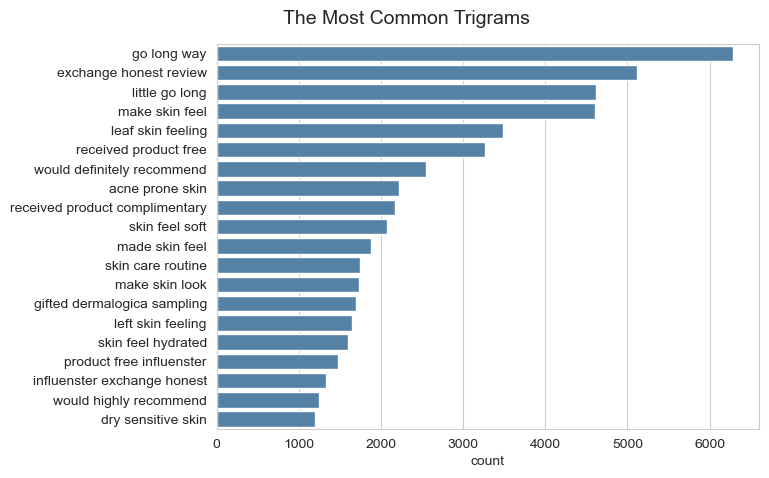

In [63]:

# Create sorted list of all trigrams
trigrams = Counter()
for phrase in latest_review['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)

# Create dataframe fromt the most common trigrams
trigrams_df = pd.DataFrame(trigrams_sorted[:20], columns=['trigram', 'count'])

# Draw a barplot 
plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
sns.barplot(x='count', color='steelblue',
            y=[' '.join(trigram) for trigram in trigrams_df['trigram']], 
            data=trigrams_df)
plt.xlabel('count')
plt.title('The Most Common Trigrams', fontsize=14, y=1.03, x=0.35)
plt.show()

Here we see the most frequent mentions of time duration, mentions of skin feeling, 
an acne problem already encountered, and another interesting observation. 
Here we can see mentions of getting the product in exchange for an honest review and getting the product complimentary, etc. 
In my opinion, it is good that the text explicitly mentions such things, it allows customers to maintain trust in the products and brands.

Finally, let's look at an example of using the n-gram in a sample of interest - negative reviews. The most frequent trigrams in negative reviews:

In [64]:
trigrams = Counter()
neg_df = latest_review[latest_review['true_sentiment'] == 'negative']
for phrase in neg_df['NLTK_text']:
    trigrams.update(nltk.trigrams(phrase))
trigrams_sorted = sorted(trigrams.items(), key=operator.itemgetter(1), reverse=True)
trigrams_sorted[:20]

[(('really', 'wanted', 'love'), 301),
 (('wanted', 'love', 'product'), 231),
 (('acne', 'prone', 'skin'), 220),
 (('really', 'wanted', 'like'), 216),
 (('exchange', 'honest', 'review'), 157),
 (('dont', 'waste', 'money'), 140),
 (('wanted', 'like', 'product'), 130),
 (('received', 'product', 'free'), 125),
 (('made', 'skin', 'feel'), 117),
 (('left', 'skin', 'feeling'), 110),
 (('make', 'skin', 'feel'), 109),
 (('didnt', 'notice', 'difference'), 103),
 (('excited', 'try', 'product'), 96),
 (('dry', 'sensitive', 'skin'), 92),
 (('didnt', 'see', 'difference'), 79),
 (('would', 'recommend', 'product'), 75),
 (('every', 'time', 'use'), 72),
 (('sits', 'top', 'skin'), 70),
 (('dont', 'sensitive', 'skin'), 67),
 (('high', 'hope', 'product'), 67)]

# sentiment

#### sentiment visualization

In [ ]:
from sentiment_nb import plot_wordcloud 

In [ ]:
# extract review based on sentiment
sentiment_positive=latest_review[latest_review['true_sentiment']=='positive']
sentiment_neutral=latest_review[latest_review['true_sentiment']=='neutral']
sentiment_negative=latest_review[latest_review['true_sentiment']=='negative']

# join the text into one string 
text_positive=' '.join(sentiment_positive['review_text'])
text_neutral=' '.join(sentiment_neutral['review_text'])
text_negative=' '.join(sentiment_negative['review_text'])

# initiate the plot
positive_plot=plot_wordcloud(text_positive,'Wordcloud for positive review')
neutral_plot=plot_wordcloud(text_neutral,'Wordcloud for neutral review')
negative_plot=plot_wordcloud(text_negative,'Wordcloud for negative review')

# Show the plot
positive_plot.show()
neutral_plot.show()
negative_plot.show()


#### Naive Bay Classfier

this section to be taken out and put seperate as sentiment_train.ipynb to reduce retraining work
- only trained model will be included under this section 
- and interative testing 

if to add:
- sentiment graph, feature extractions etc 

to do:
- model improvement hyper tuning 
- bert model 
- feature importance 

In [ ]:
from sentiment_nb import remove_plural_preprocessor
from sentiment_nb import train_naive_bayes_classifier 
from sentiment_nb import get_accuracy 
from sentiment_nb import get_confusion_matrix


In [ ]:
data = latest_review
text_col = 'review_text'

# Train the Naive Bayes classifier and get accuracy for train and test sets, and confusion matrix
classifier, train_accuracy, test_accuracy, confusion_mat = train_naive_bayes_classifier(data, text_col)

# Print accuracy for train and test sets
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_mat)

# Get accuracy for the entire dataset (can be used for validation or unseen data)
overall_accuracy = get_accuracy(classifier, data, text_col)
print(f'Overall Accuracy: {overall_accuracy:.2f}')


/Users/ljyjiayi/Library/CloudStorage/OneDrive-SingaporeManagementUniversity/609 Text/text_analytics/sentiment_nb.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews'] = data[text_col].apply(remove_plural_preprocessor)


Train Accuracy: 0.87
Test Accuracy: 0.86
Confusion Matrix:
[[60336  2284  1670]
 [ 2780  1860  1150]
 [ 1707   827  4277]]
Overall Accuracy: 0.87


#### validation

In [ ]:
from sentiment_nb import predict_single_sentiment

In [ ]:
test='I used it from almost two weeks and feel my face not looking dull anymore. Simple step to use it and make your skin looks good.'

In [ ]:
# Predict sentiment for the validation text
predicted_sentiment = predict_single_sentiment(classifier, test)
print(f'Predicted Sentiment for Validation Text: {predicted_sentiment}')

Predicted Sentiment for Validation Text: positive


In [ ]:
test='Did not like the product cos too harsh for my sensitive skin.'

In [ ]:
# Predict sentiment for the validation text
predicted_sentiment = predict_single_sentiment(classifier, test)
print(f'Predicted Sentiment for Validation Text: {predicted_sentiment}')

Predicted Sentiment for Validation Text: positive


In [ ]:
test='Not sure if I saw a difference but it didnt make my skin worse either. Affordable.'

In [ ]:
# Predict sentiment for the validation text
predicted_sentiment = predict_single_sentiment(classifier, test)
print(f'Predicted Sentiment for Validation Text: {predicted_sentiment}')

Predicted Sentiment for Validation Text: negative
